<a href="https://colab.research.google.com/github/SamraZafar-SZ/DataAnalysis/blob/main/IT_Services_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('incident_event_log.csv')

# Handle missing values
data.fillna({
    'reassignment_count': 0,
    'reopen_count': 0,
    'sys_mod_count': 0,
    'made_sla': False,
    'knowledge': False,
    'u_priority_confirmation': False,
}, inplace=True)

# Convert date columns to datetime, handling errors
date_columns = ['opened_at', 'sys_created_at', 'sys_updated_at', 'resolved_at', 'closed_at']
for column in date_columns:
    # Attempt to convert to datetime, replacing errors with NaT (Not a Time)
    data[column] = pd.to_datetime(data[column], errors='coerce')

# Convert categorical columns to category type
categorical_columns = ['incident_state', 'contact_type', 'location', 'category', 'subcategory', 'impact', 'urgency', 'priority', 'assignment_group', 'notify', 'closed_at']
for column in categorical_columns:
    data[column] = data[column].astype('category')

# Drop irrelevant columns
columns_to_drop = ['sys_created_by', 'sys_updated_by', 'caused_by', 'resolved_by', 'rfc', 'vendor', 'problem_id']
data.drop(columns=columns_to_drop, inplace=True)

# Handle potential NaT values in 'resolved_at' or 'opened_at'
data['resolution_time_hours'] = (data['resolved_at'] - data['opened_at']).dt.total_seconds().fillna(0) / 3600

# Encode categorical variables
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Normalize numerical features
numerical_columns = ['reassignment_count', 'reopen_count', 'sys_mod_count', 'resolution_time_hours']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

data.to_csv('cleaned_incident_event_log.csv', index=False)

print("Data cleaning and preprocessing completed. Cleaned data saved to 'cleaned_incident_event_log.csv'.")

<ipython-input-16-10b498998c06>:21: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[column] = pd.to_datetime(data[column], errors='coerce')
<ipython-input-16-10b498998c06>:21: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[column] = pd.to_datetime(data[column], errors='coerce')
<ipython-input-16-10b498998c06>:21: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[column] = pd.to_datetime(data[column], errors='coerce')
<ipython-input-16-10b498998c06>:21: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

Data cleaning and preprocessing completed. Cleaned data saved to 'cleaned_incident_event_log.csv'.


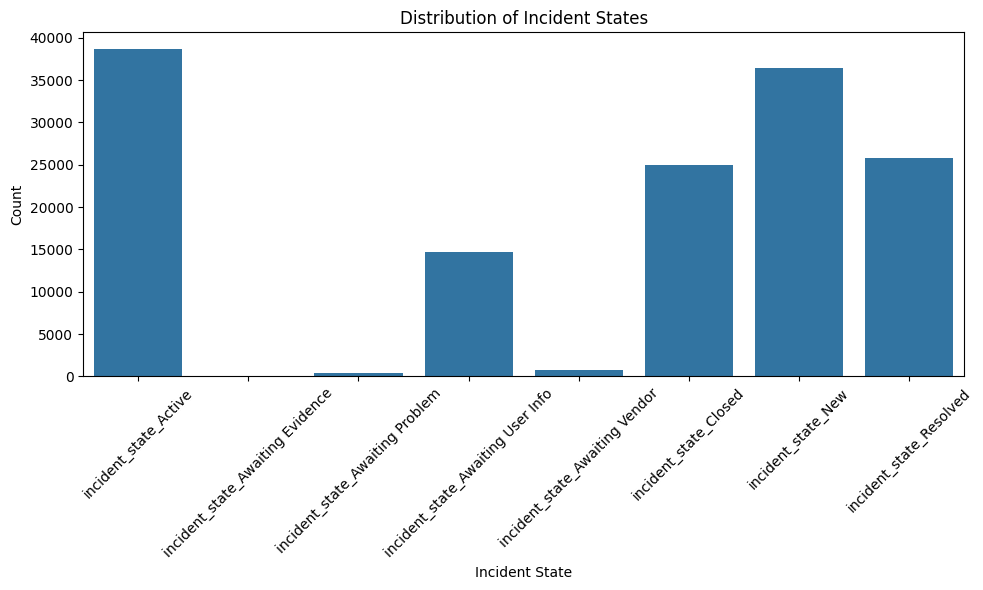

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('cleaned_incident_event_log.csv')

# one-hot encoded columns for incident states
incident_state_columns = [col for col in data.columns if 'incident_state_' in col]

#Bar plot of incident states
plt.figure(figsize=(10, 6))

# Sum the counts for each incident state
incident_state_counts = data[incident_state_columns].sum()

# Create the bar plot
sns.barplot(x=incident_state_counts.index, y=incident_state_counts.values)

plt.title('Distribution of Incident States')
plt.xticks(rotation=45)
plt.xlabel('Incident State')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



<Figure size 1000x600 with 0 Axes>

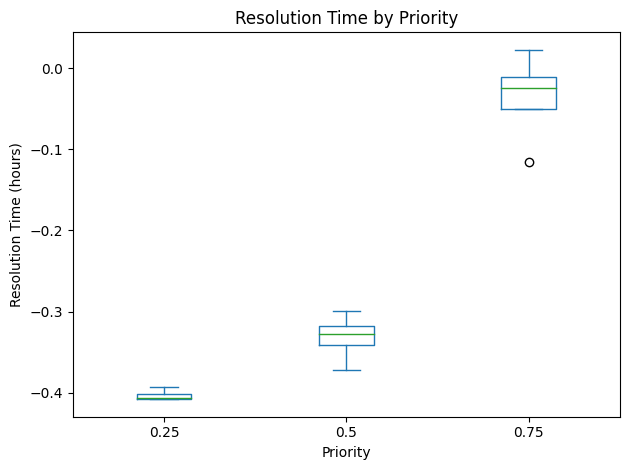

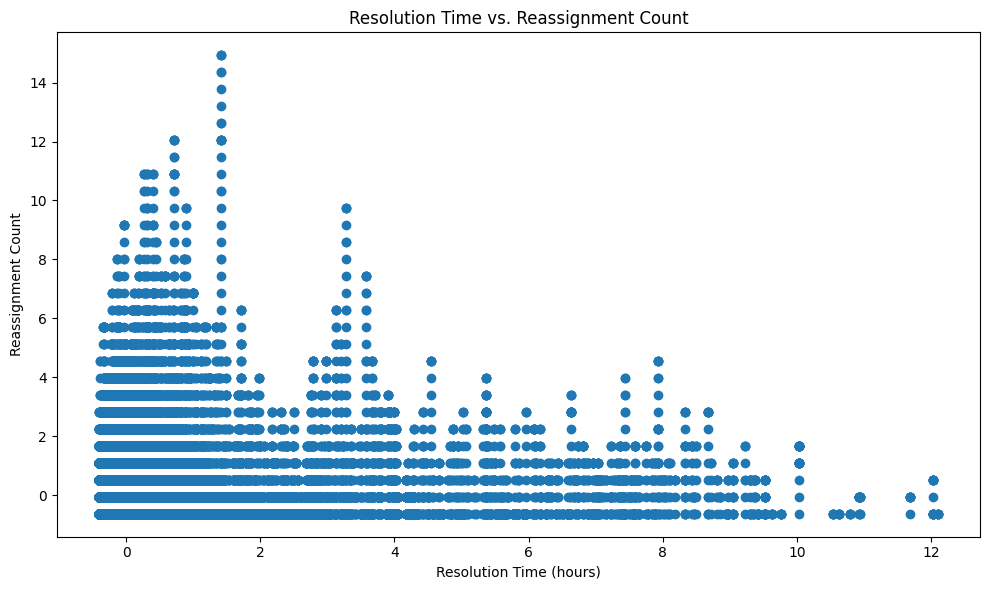

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
data = pd.read_csv('cleaned_incident_event_log.csv')

# Get the one-hot encoded columns for priority
priority_columns = [col for col in data.columns if 'priority_' in col]

# Box plot of resolution time by priority
plt.figure(figsize=(10, 6))

# Melt the DataFrame to have priority levels as a separate column
melted_data = data.melt(id_vars=['resolution_time_hours'], value_vars=priority_columns, var_name='priority', value_name='is_priority')

# Filter for rows where 'is_priority' is True (indicating the incident has that priority)
filtered_data = melted_data[melted_data['is_priority'] == 1]

# Group data by priority and calculate quartiles for resolution time
grouped_data = filtered_data.groupby('priority')['resolution_time_hours'].quantile([0.25, 0.5, 0.75]).unstack()

# Create the box plot
grouped_data.plot(kind='box')

plt.title('Resolution Time by Priority')
plt.xlabel('Priority')
plt.ylabel('Resolution Time (hours)')
plt.tight_layout()
plt.show()


# Scatter plot of resolution time vs. reassignment count
plt.figure(figsize=(10, 6))

# Create the scatter plot
plt.scatter(data['resolution_time_hours'], data['reassignment_count'])

plt.title('Resolution Time vs. Reassignment Count')
plt.xlabel('Resolution Time (hours)')
plt.ylabel('Reassignment Count')
plt.tight_layout()
plt.show()